# Anscombe's quartet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
anscombes_quartet_1 = pd.read_csv('anscombes_quartet_1.csv')
anscombes_quartet_2 = pd.read_csv('anscombes_quartet_2.csv')
anscombes_quartet_3 = pd.read_csv('anscombes_quartet_3.csv')
anscombes_quartet_4 = pd.read_csv('anscombes_quartet_4.csv')

In [3]:
title = "Anscombe's Quartet"
yaxislabel = 'Y'
xaxislabel = 'X'

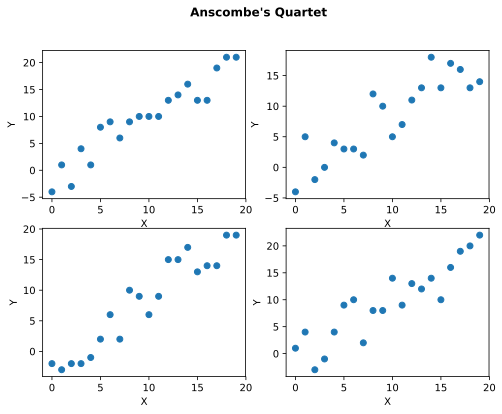

In [4]:
# This code is incomplete. I am simplifying the code in cell 4 to replace cell 5.
plt.figure(figsize=(8, 6), dpi=100,frameon=True)
plt.suptitle(title, fontweight="bold")
for i in range(2):
    for j in range(2):
        ax = plt.subplot2grid((2, 2), (i, j))
        ax.scatter(range(20), range(20) + np.random.randint(-5, 5, 20))
        ax.set_ylabel(yaxislabel)
        ax.set_xlabel(xaxislabel)

In [ ]:
# Use a colour-blind friendly colormap, "Paired".
import matplotlib.cm as cm
dots_c, line_c, *_ = cm.Paired.colors

In [ ]:
#Create the container, 1200 x 900 pixels
plt.figure(figsize=(8, 6), dpi=100,frameon=True)
plt.suptitle(title, fontweight="bold")
ax1 = plt.subplot2grid((2,2), (0,0))
ax1.scatter(anscombes_quartet_1['x'], anscombes_quartet_1['y'], color=dots_c, \
           linewidth=0, linestyle="-", s=10, label="I")
#Calculate the linear regression model
m1, b1 = np.polyfit(anscombes_quartet_1['x'], anscombes_quartet_1['y'], 1)
ax1.plot(anscombes_quartet_1['x'], m1*anscombes_quartet_1['x'] + b1, '-', color=line_c, \
        label="Linear")
ax1.set_ylabel(yaxislabel)
ax1.set_xlabel(xaxislabel)
for spine in 'right', 'top':
    ax1.spines[spine].set_color('none')
ax1.set_ylim([2, 14])
ax1.set_xlim([2, 20])
ax1.set_title('Data set I', fontsize=10)
ax2 = plt.subplot2grid((2,2), (0,1))
ax2.scatter(anscombes_quartet_2['x'], anscombes_quartet_2['y'], color=dots_c, \
           linewidth=0, linestyle="-", s=10, label="II")
m2, b2 = np.polyfit(anscombes_quartet_2['x'], anscombes_quartet_2['y'], 1)
ax2.plot(anscombes_quartet_2['x'], m2*anscombes_quartet_2['x'] + b2, '-', color=line_c)
ax2.set_ylabel(yaxislabel)
ax2.set_xlabel(xaxislabel)
for spine in 'right', 'top':
    ax2.spines[spine].set_color('none')
ax2.set_ylim([2, 14])
ax2.set_xlim([2, 20])
ax2.set_title('Data set II', fontsize=10)
ax3 = plt.subplot2grid((2,2), (1,0))
m3, b3 = np.polyfit(anscombes_quartet_3['x'], anscombes_quartet_3['y'], 1)
ax3.scatter(anscombes_quartet_3['x'], anscombes_quartet_3['y'], color=dots_c, \
           linewidth=0, linestyle="-", s=10, label="III")
ax3.plot(anscombes_quartet_3['x'], m3*anscombes_quartet_3['x'] + b3, '-', color=line_c)
ax3.set_ylabel(yaxislabel)
ax3.set_xlabel(xaxislabel)
for spine in 'right', 'top':
    ax3.spines[spine].set_color('none')
ax3.set_ylim([2, 14])
ax3.set_xlim([2, 20])
ax3.set_title('Data set III', fontsize=10)
ax4 = plt.subplot2grid((2,2), (1,1))
ax4.scatter(anscombes_quartet_4['x'], anscombes_quartet_4['y'], color=dots_c, \
           linewidth=0, linestyle="-", s=10, label="IV")
m4, b4 = np.polyfit(anscombes_quartet_4['x'], anscombes_quartet_4['y'], 1)
ax4.set_ylabel(yaxislabel)
ax4.set_xlabel(xaxislabel)
for spine in 'right', 'top':
    ax4.spines[spine].set_color('none')
ax4.set_ylim([2, 14])
ax4.set_xlim([2, 20])
ax4.set_title('Data set IV', fontsize=10)
ax4.plot(anscombes_quartet_4['x'], m4*anscombes_quartet_4['x'] + b4, '-', color=line_c)
plt.savefig('anscombes_quartet.svg', format='svg')
plt.savefig('anscombes_quartet.pdf', format='pdf')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.suptitle(title, fontweight="bold")
plt.ylabel(yaxislabel)
plt.xlabel(xaxislabel)
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(direction='out')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
m1, b1 = np.polyfit(anscombes_quartet_1['x'], anscombes_quartet_1['y'], 1)
plt.plot(anscombes_quartet_1['x'], m1*anscombes_quartet_1['x'] + b1, '-', color=line_c)
ax.scatter(anscombes_quartet_1['x'], anscombes_quartet_1['y'], color=dots_c, \
           linewidth=0, linestyle="-", s=10, label="I")
plt.axis([2, 20, 2, 14])
plt.text(4, 13, 'I', fontsize=10)
plt.ylabel(yaxislabel)
plt.xlabel(xaxislabel)
plt.savefig('anscombes_quartet_1.svg', format='svg')
plt.savefig('anscombes_quartet_1.pdf', format='pdf')

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.suptitle(title, fontweight="bold")
plt.ylabel(yaxislabel)
plt.xlabel(xaxislabel)
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(direction='out')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
m2, b2 = np.polyfit(anscombes_quartet_2['x'], anscombes_quartet_2['y'], 1)
plt.plot(anscombes_quartet_2['x'], m2*anscombes_quartet_2['x'] + b2, '-', color=line_c)
ax.scatter(anscombes_quartet_2['x'], anscombes_quartet_2['y'], color=dots_c, \
           linewidth=0, linestyle="-", s=10, label="II")
plt.axis([2, 20, 2, 14])
plt.text(4, 13, 'II', fontsize=10)
plt.ylabel(yaxislabel)
plt.xlabel(xaxislabel)
plt.savefig('anscombes_quartet_2.svg', format='svg')
plt.savefig('anscombes_quartet_2.pdf', format='pdf')

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.suptitle(title, fontweight="bold")
plt.ylabel(yaxislabel)
plt.xlabel(xaxislabel)
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(direction='out')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
m3, b3 = np.polyfit(anscombes_quartet_3['x'], anscombes_quartet_3['y'], 1)
plt.plot(anscombes_quartet_3['x'], m3*anscombes_quartet_3['x'] + b3, '-', color="red")
ax.scatter(anscombes_quartet_3['x'], anscombes_quartet_3['y'], color="blue", \
           linewidth=0, linestyle="-", s=10, label="III")
plt.axis([2, 20, 2, 14])
plt.text(4, 13, 'III', fontsize=10)
plt.ylabel(yaxislabel)
plt.xlabel(xaxislabel)
plt.savefig('anscombes_quartet_3.svg', format='svg')
plt.savefig('anscombes_quartet_3.pdf', format='pdf')

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.suptitle(title, fontweight="bold")
plt.ylabel(yaxislabel)
plt.xlabel(xaxislabel)
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(direction='out')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
m4, b4 = np.polyfit(anscombes_quartet_4['x'], anscombes_quartet_4['y'], 1)
plt.plot(anscombes_quartet_4['x'], m4*anscombes_quartet_4['x'] + b4, '-', color="red")
ax.scatter(anscombes_quartet_4['x'], anscombes_quartet_4['y'], color="blue", \
           linewidth=0, linestyle="-", s=10, label="IV")
plt.axis([2, 20, 2, 14])
plt.text(4, 13, 'IV', fontsize=10)
plt.ylabel(yaxislabel)
plt.xlabel(xaxislabel)
plt.savefig('anscombes_quartet_4.svg', format='svg')
plt.savefig('anscombes_quartet_4.pdf', format='pdf')

# References

[Wikipedia Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)